# INTRODUCCIÓN A MACHINE LEARNING

# Introducción. ¿Qué es un modelo?

Por ejemplo supongamos que nos contrata una empresa inmobiliaria.

A la empresa le interesa predecir el precio de mercado de un inmueble.

¿Y cómo lo hacían antes de contratarte? Ellos te dirán que por "intuición". Realmente lo que hacen es identificar patrones en función de casas que hayan visto venderse en el pasado.

Nosotros esencialmente haremos esto de forma automática y refinada.


Por ejemplo, podemos hacer un árbol de decisión (**Decision Tree**).

¿La casa tiene más de 2 dormitorios?
   + SÍ. Precio predicho: 188000 €.
   + NO. Precio predicho: 178000 €.

Por ejemplo, los precios predichos los podemos haber obtenido a partir de la media de precios de cada categoría.
La idea de este paso se conoce como _ajuste_ o _entrenamiento_ de los datos. (**fitting**, **training**)

Usamos **training data** para **fit** al modelo.

Se pueden añadir más variables:
¿La casa tiene más de 2 dormitorios?
+ SÍ. ¿Tiene más de 150 m^2?
    + SÍ. Precio predicho: 233000 €
    + NO. Precio predicho: 188000 €
+ NO. ¿Tiene más de 100 m^2?
    + SÍ. Precio predicho: 170000 €
    + NO. Precio predicho: 146000 €.
    
Los bloques de final del árbol, donde hacemos las predicciones de precios, se conocen como las _hojas_ del árbol (**leaves**).

# Exploración de los datos usando `pandas`

In [8]:
import pandas as pd
import numpy as np

In [3]:
casas = pd.read_csv('melb_data.csv')

In [4]:
casas.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Primero vemos todas las columnas:

In [6]:
casas.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Podemos hacer el procesamiento típico que hemos hecho en otras ocasiones:

In [10]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def clasifica_columnas(datos):
    numericas=[]
    categoricas=[]
    for i in datos.columns:
        if is_number(datos.loc[0,i]):
            numericas.append(i)
        else:
            categoricas.append(i)
    return numericas, categoricas

def procesamiento(i,datos):
    if i in numericas:
        print('Missings: ',datos.shape[0]-sum(datos[i].apply(is_number)))
        print('NaNs: ', sum(datos[i].apply(np.isnan)))
        print('Ceros: ', sum(datos[i].isin(datos[i]==0)))
        print('Tipo: ', type(datos.loc[0,i]))
    elif i in categoricas:
        print(datos[i].unique())
        ax = sns.countplot(datos[i])
        ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #Para que rote los títulos

In [11]:
numericas, categoricas = clasifica_columnas(casas)

In [13]:
for i in numericas:
    print(i)
    procesamiento(i,casas)
    print('\n')

Rooms
Missings:  0
NaNs:  0
Ceros:  0
Tipo:  <class 'numpy.int64'>


Price
Missings:  0
NaNs:  0
Ceros:  0
Tipo:  <class 'numpy.float64'>


Distance
Missings:  0
NaNs:  0
Ceros:  6
Tipo:  <class 'numpy.float64'>


Postcode
Missings:  0
NaNs:  0
Ceros:  0
Tipo:  <class 'numpy.float64'>


Bedroom2
Missings:  0
NaNs:  0
Ceros:  707
Tipo:  <class 'numpy.float64'>


Bathroom
Missings:  0
NaNs:  0
Ceros:  7546
Tipo:  <class 'numpy.float64'>


Car
Missings:  0
NaNs:  62
Ceros:  6535
Tipo:  <class 'numpy.float64'>


Landsize
Missings:  0
NaNs:  0
Ceros:  1941
Tipo:  <class 'numpy.float64'>


BuildingArea
Missings:  0
NaNs:  6450
Ceros:  28
Tipo:  <class 'numpy.float64'>


YearBuilt
Missings:  0
NaNs:  5375
Ceros:  0
Tipo:  <class 'numpy.float64'>


Lattitude
Missings:  0
NaNs:  0
Ceros:  0
Tipo:  <class 'numpy.float64'>


Longtitude
Missings:  0
NaNs:  0
Ceros:  0
Tipo:  <class 'numpy.float64'>


Propertycount
Missings:  0
NaNs:  0
Ceros:  0
Tipo:  <class 'numpy.float64'>




Afortunadamente no hay missings. ¿A qué pueden deberse los ceros y los NaNs?

In [14]:
casas['Bedroom2'].head()

0    2.0
1    2.0
2    3.0
3    3.0
4    3.0
Name: Bedroom2, dtype: float64

Los NaNs pueden deberse a que falte el dato. Pero por ejemplo, los ceros en `Bedroom2` probablemente se deban a que no haya segunda habitación.

¿Cuál es el tamaño medio de una casa? ¿Cuántos años tiene la casa más nueva?

In [20]:
casas.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Selección de los datos para modelizar

Antes de nada, vamos a quitarnos los NaN.

In [21]:
casas=casas.dropna()

In [23]:
casas.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


Primero vamos a elegir la variable de la que queremos predecir sus valores, el _objetivo de predicción_ (**prediction target**). Generalmente esta variable se suele denotar por $y$.

En este caso $y$ va a ser el precio:

In [24]:
y=casas.Price

Las columnas que usamos para hacer predicciones de $y$ son aquellas que consideramos que pueden ser relevantes para el precio. Se llaman _características_ (**features**) y sus datos se denotan por $X$. 

In [27]:
# Seleccionamos unas pocas columnas como features
features=['Rooms','Bathroom','BuildingArea','YearBuilt','Landsize','Lattitude','Longtitude']
X = casas[features]

In [28]:
X.head()

,Rooms,Bathroom,BuildingArea,YearBuilt,Landsize,Lattitude,Longtitude
1,2,1.0,79.0,1900.0,156.0,-37.8079,144.9934
2,3,2.0,150.0,1900.0,134.0,-37.8093,144.9944
4,4,1.0,142.0,2014.0,120.0,-37.8072,144.9941
6,3,2.0,210.0,1910.0,245.0,-37.8024,144.9993
7,2,1.0,107.0,1890.0,256.0,-37.8060,144.9954


In [29]:
X.describe()

,Rooms,Bathroom,BuildingArea,YearBuilt,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,141.568645,1964.081988,471.006940,-37.807904,144.990201
std,0.971079,0.711362,90.834824,38.105673,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,1196.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,91.000000,1940.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,124.000000,1970.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,170.000000,2000.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,3112.000000,2018.000000,37000.000000,-37.457090,145.526350


# Construcción del modelo

Para constuir el modelo usaremos la librería **scikit-learn** (`sklearn`).

Los pasos para hacer un modelo son:
1. **Definir**. ¿Qué tipo de modelo va ser? En nuestro caso será un Decision Tree.
1. **Ajustar** (_fit_). Obtener patrones de los datos suministrados.
1. **Predecir**.
1. **Evaluar**. Determinar cómo de buenas son las predicciones del modelo.

Veamos un ejemplo:

Importamos la librería para hacer el Decision Tree:

In [30]:
from sklearn.tree import DecisionTreeRegressor

1. Definimos el modelo:

In [32]:
casas_modelo=DecisionTreeRegressor(random_state=1)

(Con `random_state` lo que estamos haciendo es fijar un estado del generador de números aleatorios para que cada vez que lo ejecutemos nos salga lo mismo).

2. Ajustamos los datos al modelo:

In [33]:
casas_modelo.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

3. Para probarlo, hacemos predicciones de las 5 primeras casas del training data

In [38]:
prediccioneshead=casas_modelo.predict(X.head())

In [39]:
print('Hacemos predicciones de las siguientes 5 casas: ')
print(X.head())
print('\n') #Salto de línea
print('Los precios predichos son: ')
print(prediccioneshead)

Hacemos predicciones de las siguientes 5 casas: 
   Rooms  Bathroom  BuildingArea  YearBuilt  Landsize  Lattitude  Longtitude
1      2       1.0          79.0     1900.0     156.0   -37.8079    144.9934
2      3       2.0         150.0     1900.0     134.0   -37.8093    144.9944
4      4       1.0         142.0     2014.0     120.0   -37.8072    144.9941
6      3       2.0         210.0     1910.0     245.0   -37.8024    144.9993
7      2       1.0         107.0     1890.0     256.0   -37.8060    144.9954


Los precios predichos son: 
[1035000. 1465000. 1600000. 1876000. 1636000.]


Veamos si coinciden con los precios reales.

In [36]:
casas.Price.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

Son exactamente los mismos precios.

# Validación del modelo

Para evaluar la precisión del modelo, debemos comparar los valores predichos con los valores reales del target. Como no podemos irlos comparando uno a uno, necesitamos medidores (**metrics**), esto es, números que estimen la precisión del modelo.

Un ejemplo es el _error medio absoluto_ ("mean absolute error", **MAE**). 

El error de predicción producido en cada casa es simplemente
```
error = precio_real - precio_predicho
```
$$
E_i = y_i - \hat{y}_i.
$$

El MAE es el promedio de los valores absolutos de los errores de cada casa:
$$
MAE = \frac{\sum_{i=1}^n |E_i|}{n}.
$$

Otro ejemplo sería el _error cuadrático medio_ (**MSE**) y su raíz cuadrada (**RMSE**).

$$
MSE = \frac{\sum_{i=1}^n E_i^2}{n},
$$

$$
RMSE = \sqrt{MSE}.
$$

Nosotros lo calcularemos simplemente con una función de la librería scikit-learn.

In [37]:
from sklearn.metrics import mean_absolute_error

In [41]:
predicciones = casas_modelo.predict(X)

In [42]:
mean_absolute_error(y,predicciones)

434.71594577146544

El error medio es de 434 dólares y estamos manejando precios del orden del millón. Esto indica que funciona muy bien.

Sin embargo, existe un problema. Estamos evaluando la precisión del modelo en los propios training data, por tanto es lógico que el modelo funcione bien en esos mismos datos. Pero lo importante es que prediga bien los precios de casas que no están en el training data.

La forma más directa de tener este problema en cuenta es seleccionando sólo una parte de los datos como training data y usar el resto para probar el modelo. Estos son los **evaluation data**. 

Esto se implementa fácilmente en Python usando la función `train_test_split` de scikit-learn. Esta función nos separa los datos en training data y evaluation data de forma aleatoria. (De nuevo, fijando el `random_state` nos aseguramos de obtener lo mismo cada vez que lo ejecutemos).

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
# Separamos los datos en training y validation
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)

# Definimos el modelo
casas_modelo = DecisionTreeRegressor(random_state=1)

# Ajustamos los training data
casas_modelo.fit(train_X,train_y)

# Predecimos los valores de los evaluation data
val_predicciones = casas_modelo.predict(val_X)

# Evaluamos
print('Error: ', mean_absolute_error(val_y,val_predicciones))

Error:  252318.87217559715


¡Corcho! Tengo un error de más de 250K dólares, que es aproximadamente un cuarto del precio medio, eso es mucho. Resulta que el modelo no era tan bueno como parecía.

# Underfitting y overfitting

Meter muy pocas hojas da predicciones poco precisas, ya que no tiene en cuenta la riqueza y todas las posibles características que se pueden dar. Esto se conoce como **underfitting**.

Para obtener más precisión podríamos meter más divisiones en el árbol. Notemos que en general el número de hojas es $2^n$, con $n$ el número de divisiones.

Sin embargo, si tenemos muchas hojas tendremos menos casas en cada hoja. Las hojas con muy pocas casas harán predicciones muy buenas para esas mismas casas pero como cada predicción se basa en muy pocas casas, las predicciones de datos nuevos serán muy malas. Esto se conoce como **overfitting**.

En general tenemos una curva:

![image](sweetspot.jpg)

¿Cómo encontramos el **sweet spot**?

`DecisionTreeRegressor` tiene una opción `max_leaf_nodes` que nos permite controlar la complejidad del modelo. 

Podemos definir una función que nos diga el MAE que se obtiene para cada número de hojas:

In [47]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    modelo = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0) # Definir
    modelo.fit(train_X,train_y) # Ajustar
    preds_val = modelo.predict(val_X) # Predecir
    mae = mean_absolute_error(val_y, preds_val) # Evaluar
    return mae

Usando un bucle `for` podemos comparar la precisión para distintos valores de `max_leaf_nodes`.

In [48]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: ", max_leaf_nodes)
    print("MAE: ", my_mae)
    print("\n")

Max leaf nodes:  5
MAE:  324110.91454760684


Max leaf nodes:  50
MAE:  252108.93840069315


Max leaf nodes:  500
MAE:  240322.85576390434


Max leaf nodes:  5000
MAE:  250809.83989670756




La opción óptima de las que le hemos dado es 500.

Otra forma más directa:

In [49]:
candidatas_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

my_mae=[]
for i in candidatas_max_leaf_nodes:
    my_mae.append(get_mae(i, train_X, val_X, train_y, val_y))
    
mae_optimo = min(my_mae)
max_leaf_nodes_optimo = candidatas_max_leaf_nodes[my_mae.index(min(my_mae))]

In [50]:
mae_optimo, max_leaf_nodes_optimo

(238337.81564194776, 250)

También lo puedo ver gráficamente:

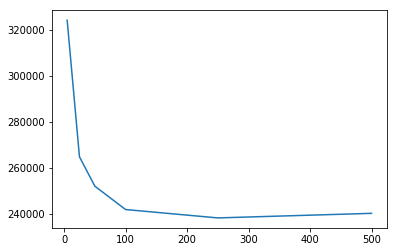

In [52]:
import matplotlib.pyplot as plt

plt.plot(candidatas_max_leaf_nodes,my_mae)

Ahora que ya hemos encontrado el número óptimo de hojas de nuestro modelo, ya no necesitamos separar entre training y evaluation data y podemos crear un modelo final con todos los datos de los que disponemos.

In [54]:
# Definir
casas_modelo_final = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes_optimo,random_state=1)

# Ajustar
casas_modelo_final.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=250, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

# Random forest

Una forma de evitarse el tener que buscar el número de hojas óptimo es utilizar un algoritmo distinto, el **random forest**. Un random forest genera muchos árboles y hace una predicción ponderando las predicciones de cada árbol. En general es más preciso que un solo árbol de decisión y funciona bien con los parámetros por defecto.

Para implementarlo en Python usamos la clase `RandomForestRegressor` de scikit-learn.

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
# Definir
casas_modelo_forest = RandomForestRegressor(random_state=1)

# Ajustar
casas_modelo_forest.fit(train_X, train_y)

# Predecir
predicciones = casas_modelo_forest.predict(val_X)

# Evaluar
print('Error: ', mean_absolute_error(val_y,predicciones))

Error:  185910.98665805894


/home/guillermo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Sigue siendo bastante, pero es una buena mejoría respecto al Decision Tree.

# Tarea final

Probar suerte en una competición de Kaggle.